With exam period approaching fast, every student is wondering how to score the best possible grade. Some factors—like how much sleep you're getting or how healthy you are—seem to have an obvious correlation with your final grade. What about your relationship status? How much should you be studying to achieve the grade you want? Does the subject you're studying influence your final grade? In this article, we will use two datasets containing student math and Portuguese language performance in two different Portuguese schools and see which factors affected student performance the most. 

## Exploratory Data Analysis

### Dataset Overview

The variables are the same for the two datasets:

|  Variable  |           Description           |   Type  |                          Possible Values                          |
|:----------:|:-------------------------------:|:-------:|:-----------------------------------------------------------------:|
|   school   |              School             |  binary |            GP—Gabriel Pereira; MS—Mousinho da Silveira            |
|     sex    |               Sex               |  binary |                          F—female; M—male                         |
|     age    |               Age               | numeric |                          15–22, inclusive                         |
|   address  |           Address type          |  binary |                          U—Urban; R—Rural                         |
|   famsize  |           Family Size           |  binary |          LE3—less than or equal to 3; GE3—greater than 3          |
|   Pstatus  |   Parent's cohabitation status  |  binary |                 T—living together; A—living apart                 |
|    Medu    |        Mother's Education       | ordinal | 0—none; 1—up to 4th grade; 2—5th–9th grade; 3—secondary; 4—higher |
|    Fedu    |        Father's Education       | ordinal | 0—none; 1—up to 4th grade; 2—5th–9th grade; 3—secondary; 4—higher |
|    Mjob    |           Mother's Job          | nominal |  teacher; health(-care related); (civil )services; at home; other |
|    Fjob    |           Father's Job          | nominal |  teacher; health(-care related); (civil )services; at home; other |
|   reason   |    Reason for choosing school   | nominal |  (close to )home; (school )reputation; course(preference); other  |
|  guardian  |        Student's guardian       | nominal |                       mother; father; other                       |
| traveltime |      Travel time to school      | ordinal |       1—<15 min.; 2—15–30 min.; 3—30 min.–1 hour; 4—>1 hour       |
|  studytime |        Weekly study time        | ordinal |         1—<2 hours; 2—2–5 hours; 3—5–10 hours; 4—>10 hours        |
|  failures  |       Past class failures       | numeric |                            0–3, else 4                            |
|  schoolsup |    Extra educational support    |  binary |                              yes; no                              |
|   famsup   |    Family educational support   |  binary |                              yes; no                              |
|    paid    |        Extra paid classes       |  binary |                              yes; no                              |
| activities |   Extra-curricular activities   |  binary |                              yes; no                              |
|   nursery  |          Attend nursery         |  binary |                              yes; no                              |
|   higher   |  Wants to take higher education |  binary |                              yes; no                              |
|  internet  |       Home internet access      |  binary |                              yes; no                              |
|  romantic  |    In a romantic relationship   |  binary |                              yes; no                              |
|   famrel   | Quality of family relationships | ordinal |                     1—very bad to 5—very good                     |
|  freetime  |      Free time after school     | ordinal |                     1—very low to 5—very high                     |
|    goout   |      Going out with friends     | ordinal |                     1—very low to 5—very high                     |
|    Dalc    |   Workday alcohol consumption   | ordinal |                     1—very low to 5—very high                     |
|    Walc    |   Weekend alcohol consumption   | ordinal |                     1—very low to 5—very high                     |
|   health   |      Current health status      | ordinal |                     1—very bad to 5—very good                     |
|  absences  |         Number absences         | numeric |                                0–93                               |
|     G1     |        First Period Grade       | numeric |                                0–20                               |
|     G2     |       Second Period Grade       | numeric |                                0–20                               |
|     G3     |           Final Grade           | numeric |                                0–20                               |

I will be conducting a basic analysis of the dataset followed by visualizations of the correlations between different factors. Finally, I will build a linear regression model for each subject to predict the students' final grades. 

We will start by importing all the necessary packages and load the datasets into a pandas dataframe.

In [41]:
# Import necessary packages
import pandas as pd  
import numpy as np  

import statistics as stats
import statsmodels.api as sm

# Load the dataset from the csv file using pandas
data_m = pd.read_csv(r'data\student-mat.csv', sep=';')
data_p = pd.read_csv(r'data\student-por.csv', sep=';')

In [42]:
# Post formatting
from IPython.display import Markdown
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
pd.set_option('display.max_columns', None)

# Additional imports
import seaborn as sns
import matplotlib.pyplot as plt

We can start by taking a look at the first few rows of each dataset.

In [43]:
print('First 5 lines of the math performance dataset:')
display(data_m.head())
print('First 5 lines of the Portuguese performance dataset:')
display(data_p.head())

First 5 lines of the math performance dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


First 5 lines of the Portuguese performance dataset:


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


An important detail to note is that there are 395 high school students in the math dataset and 649 in the Portuguese dataset. The grades of the student are from 0 to 20. Furthermore, there are 16 numerical variables out of 33; the rest of the variables will need to be one-hot encoded when we will analyze correlations and build the regression model. 

Now let's visualize the final grades distributions for both subjects.

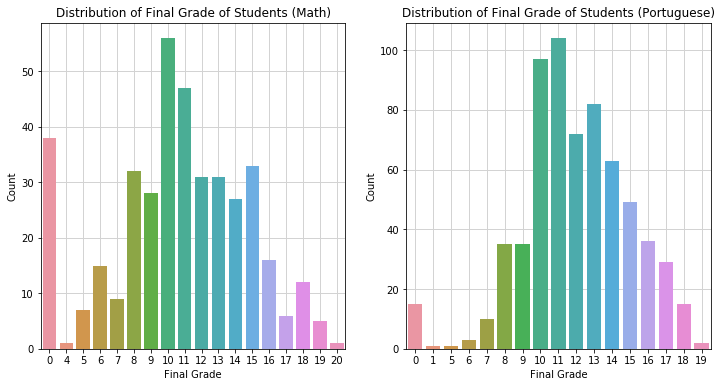

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

def count_plot(series, ax, subject):
    sns.countplot(series, ax=ax)
    ax.axes.set_title(f'Distribution of Final Grade of Students ({subject})')
    ax.set_xlabel('Final Grade')
    ax.set_ylabel('Count')
    ax.grid(b=True, which='major', color='lightgrey', linewidth=1.0)
    ax.set_axisbelow(True)
    
count_plot(data_m['G3'], ax=axs[0], subject='Math')
count_plot(data_p['G3'], ax=axs[1], subject='Portuguese')

average_G3m = stats.mean(data_m['G3'])
average_G3p = stats.mean(data_p['G3'])

In [45]:
Markdown(
    "We can also calculate that the average final grades for math and Portuguese students "
    f"are {average_G3m:.02f} and {average_G3p:.02f}, respectively. This suggests that "
    "Portuguese students score higher on average than math students although this comparison "
    "could easily have been skewed by the large number of math students scoring zero."
)

We can also calculate that the average final grades for math and Portuguese students are 10.42 and 11.91, respectively. This suggests that Portuguese students score higher on average than math students although this comparison could easily have been skewed by the large number of math students scoring zero.

### Finding and Visualizing Correlations for Numerical Variables

In [46]:
def corrplot(df, subject, shrink_axis_labels=False):
    corr = df.corr()
    grade_corr = corr['G3'].sort_values()
    cmap = sns.diverging_palette(50, 275,s=80, l=55, n=200)

    # match colour map with correlation plot
    col_idx = [int((c + 1) * 199 / 2) for c in grade_corr]
    bar_cols = sns.color_palette([cmap[i] for i in col_idx])

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    plt.subplots_adjust(wspace=.4 if shrink_axis_labels else .3)

    sns.barplot(
        grade_corr.index,
        grade_corr.values,
        palette=bar_cols,
        edgecolor=".2",
        ax=axs[0]
    )
    axs[0].set_xticklabels(
        axs[0].get_xticklabels(),
        rotation=90,
        fontsize = 8 if shrink_axis_labels else 12
    )
    axs[0].set_title(f"Correlations Between Predictors and Final Grade ({subject})")
    axs[0].grid(b=True, which='major', color='lightgrey', linewidth=1.0)
    axs[0].set_axisbelow(True)

    sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(50, 275,s=80, l=55, n=200),
        square=True,
        xticklabels=True,
        yticklabels=True,
        ax=axs[1],
        cbar_kws={"shrink": 0.65}
    )
    axs[1].set_xticklabels(
        axs[1].get_xticklabels(),
        rotation=90
    )
    axs[1].set_title(f"Correlations Between All Variables ({subject})");

We are now going to automatically find the variables with the strongest correlation to the final grades for both datasets. Finding correlations between non-numeric features and the outcome can get a bit messy, so we will focus on testing only the existing numerical values of the datasets at first. To better visualize the insights, we will also use correlation bar plots and heat maps for both datasets.

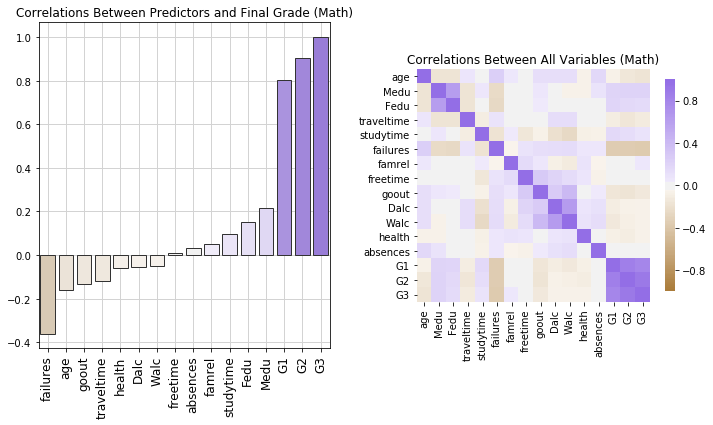

In [47]:
corrplot(data_m, subject='Math')

To interpret correlation bar plots and heat map:
- The darker the bar/square, the stronger the correlation is. 
- Brown represents negative correlations, whereas purple represents positive correlations. 

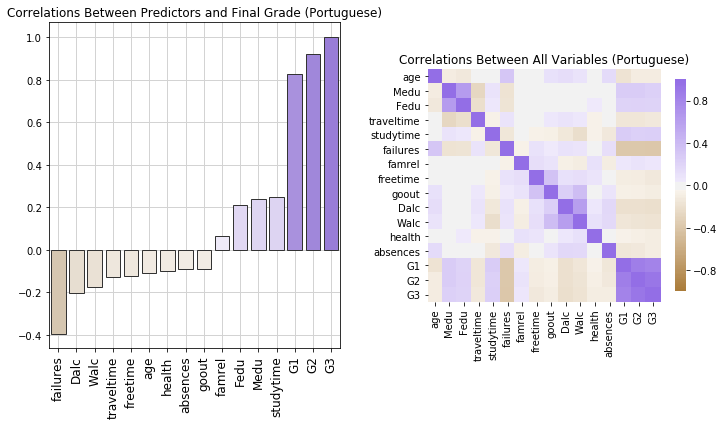

In [48]:
corrplot(data_p, subject='Portuguese')

Insights:
- For both datasets, the number of past classes `failures` has a strong negative correlation with `G3`.
- Other common variables with a negative correlation are `age`, frequency of going out with friends (`goout`), `traveltime`, `freetime` and `health`. 
- `G1` and `G2` have very strong positive correlation coefficients for both datasets because student performance usually remains constant throughout the year; we will therefore ignore them. 
- Other common variables with a positive correlation are: `studytime`, education of parents (`Fedu` and `Medu`) and family relationship (`famrel`).

### One-Hot Encoding

In order to get more insight from these datasets, we need to be able to use the categorical variables as well. An example of categorical variable is the `school` variable (the student is either at Gabriel Pereira or Mousinho da Silveira) as there are multiple possible values with no intrinsic ordering. We will use a technique called one-hot encoding, which assigns binary value to each category level indicating whether or not that level was the value of the original predictor. Here is an example of how it would look like for the variable father's job (`Fjob`).

| Father's Job    | Occupation_teacher| Occupation_health | Occupation_services |Occupation_at_home |Occupation_other |
| ----------------|:----------------: |:-----------------:|:------------------: |:----------------: |:---------------: |
| teacher         | 1                 | 0                 | 0                   |0                  |0                 |
| health          | 0                 | 1                 | 0                   |0                  |0                 |
| services        | 0                 | 0                 | 1                   |0                  |0                 |
| at_home         | 0                 | 0                 | 0                   |1                  |0                 |
| other           | 0                 | 0                 | 0                   |0                  |1                 |

In [49]:
def one_hot_encode(df):
    # Select only categorical variables
    cat_df = df.select_dtypes(include=['object'])
    
    # One-hot encode variables
    dummy_df = pd.get_dummies(cat_df, drop_first=True)
    
    # Add the response back and return
    dummy_df['G3'] = df['G3']
    return dummy_df

# One-hot encode both datasets
dummy_dfm = one_hot_encode(data_m)
dummy_dfp = one_hot_encode(data_p)

### Finding and Visualizing Correlations for Encoded Categorical Variables

We can now analyze the correlation coefficients for the final grades of all the variables for both datasets.

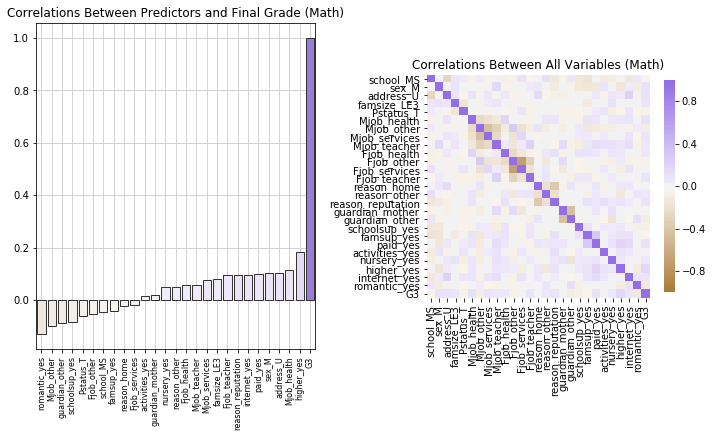

In [50]:
corrplot(dummy_dfm, subject='Math', shrink_axis_labels=True)

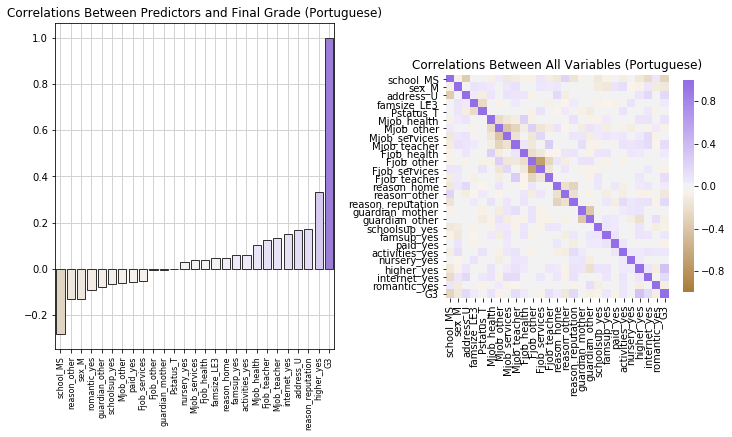

In [51]:
corrplot(dummy_dfp, subject='Portuguese', shrink_axis_labels=True)

Insights:
- Variables that impact negatively final grades in both datasets: in a romantic relationship (`romantic_yes`), does not want to go to higher education (`higher_no`), lives in a rural area (`address_R`) and has no access to internet (`internet_no`).
- Variables that impact positively final grades in both datasets: not in a romantic relationship (`romantic_no`), wants to go to higher education (`higher_yes`), lives in a urban area (`address_U`), has access to internet (`internet_no`).
- In Portuguese performance dataset, the `school` variable has a very high impact on the final grade (negatively impacted if goes to MS and positively impacted if goes to GP).
- Males seem to score higher in math whereas females score higher in portuguese.

## Visualizing Key Trends

Some of the results are quite unexpected so let's visualize them. 

### Effect of Address Type on Grades

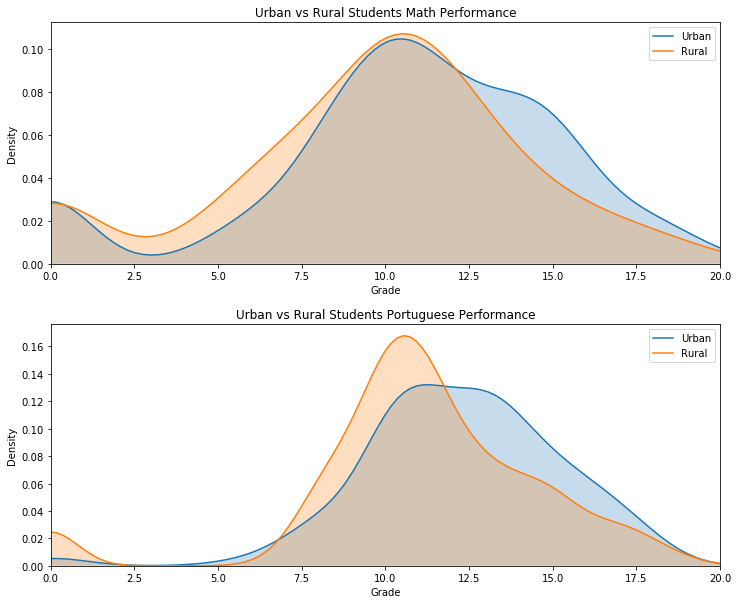

In [52]:
fig, axs = plt.subplots(2, 1, figsize=(12,10))
plt.subplots_adjust(hspace=.25)

def address_density_plot(data, ax, subject):
    ax.set_xlim(0, 20)
    sns.kdeplot(data.loc[data['address'] == 'U', 'G3'], label='Urban', shade=True, ax=ax)
    sns.kdeplot(data.loc[data['address'] == 'R', 'G3'], label='Rural', shade=True, ax=ax)
    ax.set_title(f'Urban vs Rural Students {subject} Performance')
    ax.set_xlabel('Grade')
    ax.set_ylabel('Density')

address_density_plot(data_m, axs[0], subject='Math')
address_density_plot(data_p, axs[1], subject='Portuguese')

Insights: 
- For math performance, there is not too much difference between urban and rural students. However, urban students tend to score slightly more.
- For portuguese performance, we can see that urban students score higher more often than rural students.

### Effect of Relationship Status on Grades

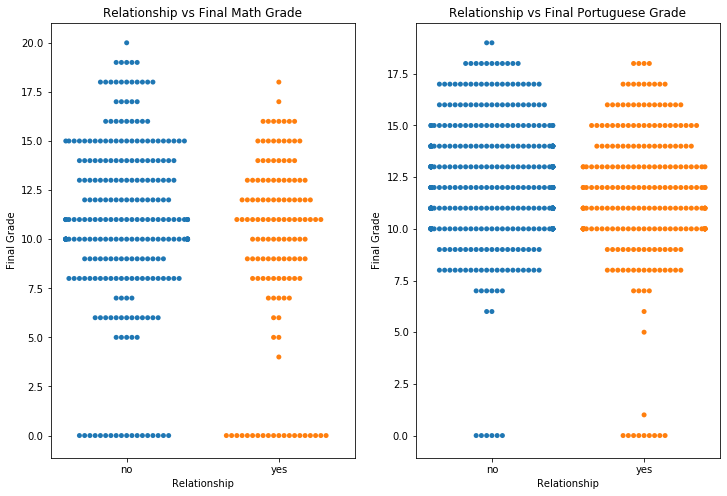

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(12,8))

def relationship_plot(data, ax, subject):
    ax.set_xlim(0, 20)
    sns.swarmplot(x='romantic', y='G3', data=data, ax=ax)
    ax.set_title(f'Relationship vs Final {subject} Grade')
    ax.set_xlabel('Relationship')
    ax.set_ylabel('Final Grade')

relationship_plot(data_m, axs[0], subject='Math')
relationship_plot(data_p, axs[1], subject='Portuguese')

#Print number of students in romantic relationship in the math performance dataset
couple_math= data_m[(data_m['romantic']) == "yes"]["romantic"].count()
couple_por= data_p[(data_p['romantic']) == "yes"]["romantic"].count()

In [54]:
Markdown(
    f"Note, that of the {data_m.shape[0]} math students, {couple_math} "
    f"({couple_math / data_m.shape[0] * 100:.01f}%) were in a relationship. "
    f"Likewise {couple_por} ({couple_por / data_p.shape[0] * 100:.01f}%) or "
    f"of the {data_p.shape[0]} Portuguese students were in a relationship"
)

Note, that of the 395 math students, 132 (33.4%) were in a relationship. Likewise 239 (36.8%) or of the 649 Portuguese students were in a relationship

Insights: 
- In both datasets, there are more single students than in a relationship (only 33% in math dataset and 36% in portuguese dataset). This might skew results as there is less data to analyze for students in a relationship. We can see that in the Portuguese dataset where there are more values to analyze, the scatter plot shapes tend to look more similar. 
- Not enough data to say if relationship has true impact on math performance. 

### Effect of Sex on Grades

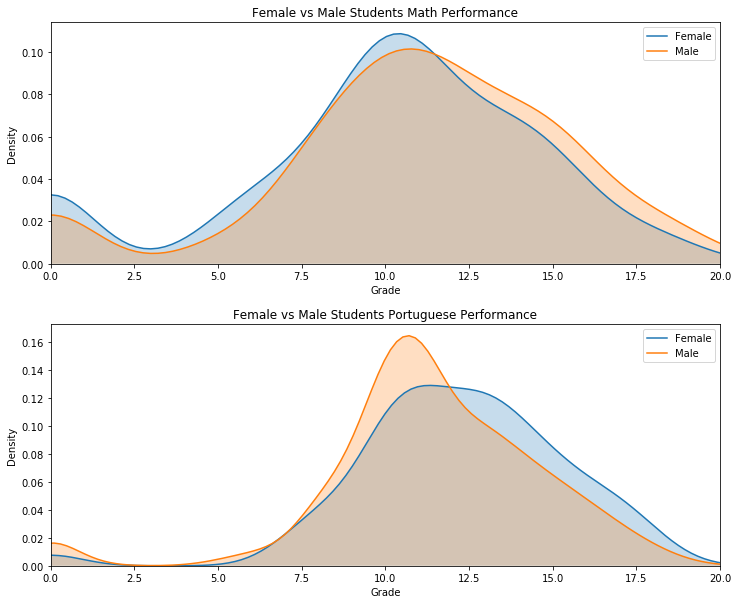

In [55]:
fig, axs = plt.subplots(2, 1, figsize=(12,10))
plt.subplots_adjust(hspace=.25)

def sex_plot(data, ax, subject):
    ax.set_xlim(0, 20)
    sns.kdeplot(data.loc[data['sex'] == 'F', 'G3'], label='Female', shade=True, ax=ax)
    sns.kdeplot(data.loc[data['sex'] == 'M', 'G3'], label='Male', shade=True, ax=ax)
    ax.set_title(f'Female vs Male Students {subject} Performance')
    ax.set_xlabel('Grade')
    ax.set_ylabel('Density')

sex_plot(data_m, axs[0], subject='Math')
sex_plot(data_p, axs[1], subject='Portuguese')

### Effect of School Choice on Grades

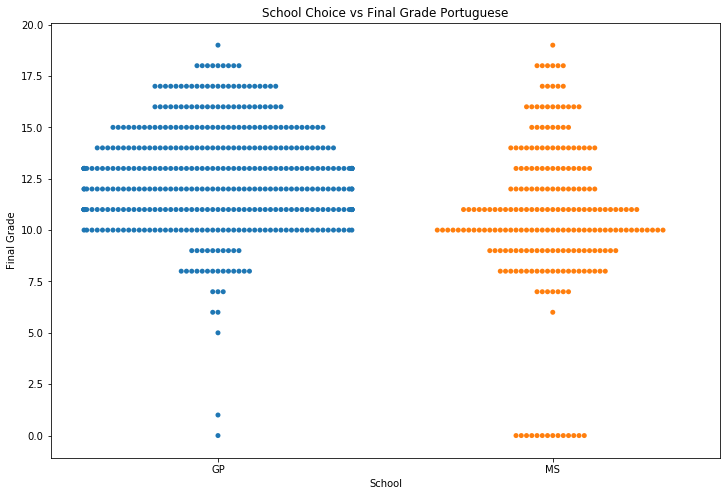

In [56]:
#Analyzing impact of choice of school on Portuguese performance
plt.subplots(figsize=(12,8))
b = sns.swarmplot(x='school', y='G3', data=data_p)
b.axes.set_title('School Choice vs Final Grade Portuguese')
b.set_xlabel('School')
b.set_ylabel('Final Grade');

Insights: 
- From the available data, MS students (`school_MS`) tend to score less than GP students (`school_GP`) in Portuguese. Maybe GP is specialized in Portuguese and students have access to higher-quality resources.
- However as for the relationship analysis, there are less students going to MS so it might affect results.

## Model-fitting

We are now going to build a multi-linear regression model for both datasets. To avoid the impact of correlated variables, we only use the top twelve most influential predictors. We start with the math scores.

In [57]:
def fit_regression_model(df, dummy_df):
    num_df = df.select_dtypes(exclude=['object'])
    full_df = pd.concat([num_df, dummy_df.drop('G3', axis=1)], axis=1)
    full_df.drop(['G1', 'G2'], axis=1, inplace=True)
    most_inf = np.abs(full_df.corr()['G3']).sort_values()[-13:].index
    red_df = full_df.loc[:, most_inf]

    X = np.array(red_df.drop('G3', axis=1))
    y = np.array(red_df['G3'])

    Z = sm.add_constant(X)
    mod = sm.OLS(y, Z).fit()
    
    results_as_html = mod.summary().tables[1].as_html()
    coeffs = pd.read_html(results_as_html, header=0, index_col=0)[0]
    coeffs = coeffs.set_index(pd.Index(['intercept']).append(red_df.drop('G3', axis=1).columns))
    
    return mod.rsquared, coeffs

In [58]:
r2_m, coeffs_m = fit_regression_model(data_m, dummy_dfm)

print(f"Model R^2: {r2_m:.02f}")
display(coeffs_m)

Model R^2: 0.20


,coef,std err,t,P>|t|,[0.025,0.975]
intercept,10.2932,3.454,2.981,0.003,3.503,17.083
paid_yes,0.2347,0.439,0.534,0.593,-0.629,1.099
sex_M,1.1617,0.436,2.665,0.008,0.305,2.019
address_U,0.5889,0.543,1.084,0.279,-0.479,1.657
Mjob_health,1.1831,0.779,1.519,0.130,-0.349,2.715
traveltime,-0.2877,0.324,-0.887,0.376,-0.926,0.350
romantic_yes,-0.8371,0.458,-1.829,0.068,-1.737,0.063
goout,-0.4753,0.194,-2.450,0.015,-0.857,-0.094
Fedu,-0.1004,0.251,-0.400,0.689,-0.594,0.393
age,-0.0467,0.178,-0.263,0.793,-0.396,0.302


Insights for math data set linear regression model:
- Our model explains explains 20% of the inputs into the final grade (`G3`), however it could still be improve if the goal of this article would be pure accuracy. 
- We can see that the willingness of the student to go into higher education (`higher_yes`) is a variable with one of the largest absolute coefficients. If the student is willing to go into higher education, their score will increase, on average, by 1.44 points. 
- There are other statistically significant coefficients such as `failures`, `sex_M`, and `goout`. 
- For example, `failures` plays a decisive role in student performance: for each class the student has failed in the past, they can roughly except a decrease of 1.74 in their final score. 

And now for the Portuguese scores.

In [59]:
r2_p, coeffs_p = fit_regression_model(data_p, dummy_dfp)

print(f"Model R^2: {r2_p:.03f}")
display(coeffs_p)

Model R^2: 0.305


,coef,std err,t,P>|t|,[0.025,0.975]
intercept,9.8593,0.612,16.114,0.000,8.658,11.061
Mjob_teacher,0.2976,0.384,0.776,0.438,-0.456,1.051
internet_yes,0.3248,0.269,1.207,0.228,-0.204,0.853
address_U,0.3521,0.252,1.397,0.163,-0.143,0.847
reason_reputation,0.4602,0.270,1.704,0.089,-0.070,0.990
Walc,-0.1570,0.108,-1.455,0.146,-0.369,0.055
Dalc,-0.3119,0.149,-2.098,0.036,-0.604,-0.020
Fedu,0.1503,0.129,1.169,0.243,-0.102,0.403
Medu,0.0980,0.137,0.718,0.473,-0.170,0.366
studytime,0.4366,0.137,3.192,0.001,0.168,0.705


Insights for the portuguese data set linear regression model:
- Our model explains explains 30.5% of the inputs into the final grade (`G3`), better than the math model but still leaving room for improvement.
- We again see that the desire to go into higher education and the number of previous failures are highly influential when determining a student's final grade.
- There are other statistically significant coefficients such as `school_MS`, `failures` and `studytime`. 
- In fact, the influence of going to Mousinho da Silveira is strong, with an expected decrease in one mark in a student's Portuguese grade

## Conclusion

We have seen that many factors can influence your final grades, the strongest of which typically being socio-economic characteristics (address, parent's education, family relationship, etc.) that cannot be changed. Those factors can also depend on the potential biases of the dataset. For example, maybe the mother's unemployment status has a bigger cultural impact on Portuguese student than on UK students. However, some variables that are controllable by the student such as `studytime`, going out (`goout`), consumption of alcohol (`Dalc` and `Walc`) and potentially relationship status (`romantic`) have been proved to have an impact on the final grade (`G3`) of students in these datasets. 

Although valuable insights have been gleaned from this dataset it is clear from our poorly fitting regression model that linear interactions alone are insufficient for capturing a system as complicated as a student's school performance. If a purely performative model is what we desired, then moving towards a tree-based model or including carefully chosen interaction terms would be advised.